In [1]:
import numpy as np
import os
import sys 
import pandas as pd
import matplotlib.pyplot as plt
import pickle 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [36]:
# indexing results 
# for stat in range(1)
iters = []
for res in range(4):
    file_path = 'results/indexing/iteration_results_num'+str(res)+'.txt'
    d = {}
    with open(file_path) as f:
        for line in f:
           (key, val) = line.split(':')
           d[key] = float(val[:-2])
    iters.append(d)

In [42]:
mean_dict = {}
for key in iters[0].keys():
    stats = [iters[j].get(key) for j in range(4)]
    mean_dict[key] = np.round(np.mean(stats), 4)

In [43]:
mean_dict

{'indexing took': 12.7902,
 'meta reading took': 13.3966,
 'log fitting took': 1.1808,
 'log filtered set size (our)': 3859.0,
 'log filtering TP (our)': 687.25,
 'log filtering took (our)': 0.0309,
 'log filtered set size (Scope)': 1094.0,
 'log filtering TP (Scope)': 522.5,
 'log filtering took (Scope)': 0.0131,
 'cnn fitting took': 412.7595,
 'cnn filtered set size (Our)': 5319.5,
 'cnn filtering TP (Our)': 763.5,
 'cnn filtering took (our)': 41.5417,
 'cnn filtered set size (Scope)': 2930.25,
 'cnn filtering TP (Scope)': 440.75,
 'cnn filtering took (Scope)': 213.4412}

In [45]:
df = pd.DataFrame(columns=['Model', 'Time', 'Size of Filtered Set', 'TP'])
df.loc[0] = ['Log (our)', (12.7902+13.3966+1.1808+0.0309), 3859.0, 688]
df.loc[1] = ['Log (Scope)', (12.7902+13.3966+1.1808+0.0131), 1094.0, 523]
df.loc[2] = ['CNN (our)', (12.7902+13.3966+412.7595+41.5417), 5320, 764]
df.loc[4] = ['CNN (Scope)', (12.7902+13.3966+412.7595+213.4412), 2931, 441]


In [5]:
index = ['Log (our)', 'Log (Scope)', 'CNN (our)',  'CNN (Scope)']
time = [(12.7902+13.3966+1.1808+0.0309), (12.7902+13.3966+1.1808+0.0131), (12.7902+13.3966+412.7595+41.5417), (12.7902+13.3966+412.7595+213.4412)]
size_filtered = [3859-688, 1094-523, 5320-764, 2931-441]
tp = [688, 523, 764, 441]
poolt = pd.DataFrame({'time': time, 'true positive':tp, 'other': size_filtered}, index=index)
poolt.head()

,time,true positive,other
Log (our),27.3985,688,3171
Log (Scope),27.3807,523,571
CNN (our),480.4880,764,4556
CNN (Scope),652.3875,441,2490


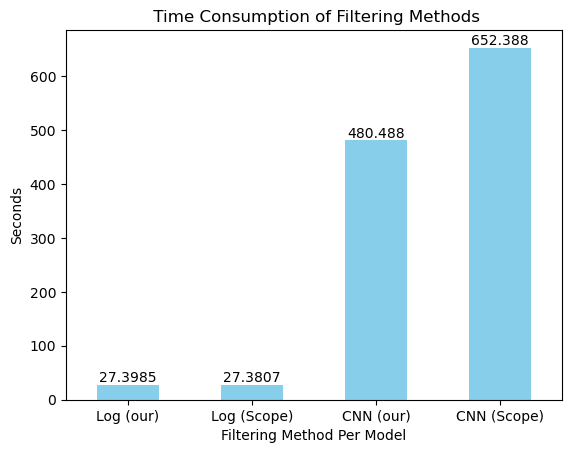

In [10]:
ax = poolt.time.plot.bar(rot=0, xlabel='Filtering Method Per Model', ylabel='Seconds', title =' Time Consumption of Filtering Methods',  color =("skyblue"))
for container in ax.containers:
    ax.bar_label(container)

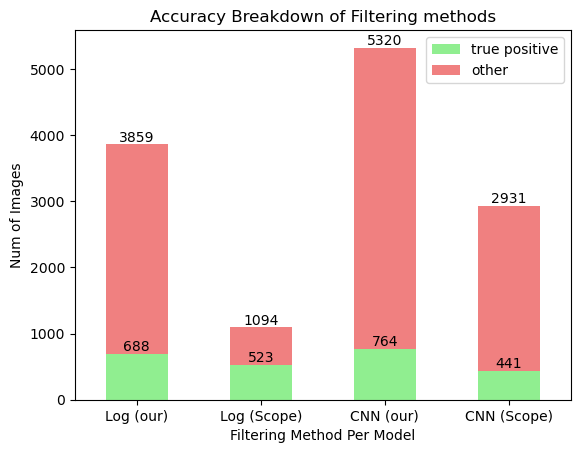

In [11]:
ax = poolt[['true positive', 'other']].plot.bar(rot=0,stacked=True,  xlabel='Filtering Method Per Model', ylabel='Num of Images', title ='Accuracy Breakdown of Filtering methods', color={"true positive": "lightgreen", "other": "lightcoral"})
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
index = ['YOLOv8 (Naive/Ground Truth)', 'Yolov8 (Our filtering)', 'Tiny (Our filtering)']
time = [(3.2*60), (35.7), 53079.0]
estimate = [  , 62438, ] # indx 53079.0
tp = [688, 523, 764, 441]
poolt = pd.DataFrame({'time': time, 'tp':tp, 'other': size_filtered}, index=index)
poolt.head()